#### Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

#### Get data

In [2]:
df=pd.read_csv("customer_booking.csv",encoding='ISO-8859-1')

In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


#### Data Exploration:

In [4]:
df.shape

(50000, 14)

In [5]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [8]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

#### Data Preprocessing:

In [9]:
x=df.drop(columns=['booking_complete'])
y=df.booking_complete

In [10]:
le=LabelEncoder()
for colname in x.select_dtypes("object"):
    x[colname]=le.fit_transform(x[colname])

#### Feature Selection:

In [11]:
values=mutual_info_classif(x,y)
mi_score=pd.Series(values,index=x.columns)
mi_score=mi_score.sort_values(ascending=False)
mi_score

route                    0.051407
booking_origin           0.045986
flight_duration          0.016281
trip_type                0.007907
length_of_stay           0.007307
purchase_lead            0.004226
wants_extra_baggage      0.003712
sales_channel            0.002720
wants_in_flight_meals    0.002020
num_passengers           0.001873
wants_preferred_seat     0.001804
flight_hour              0.000647
flight_day               0.000000
dtype: float64

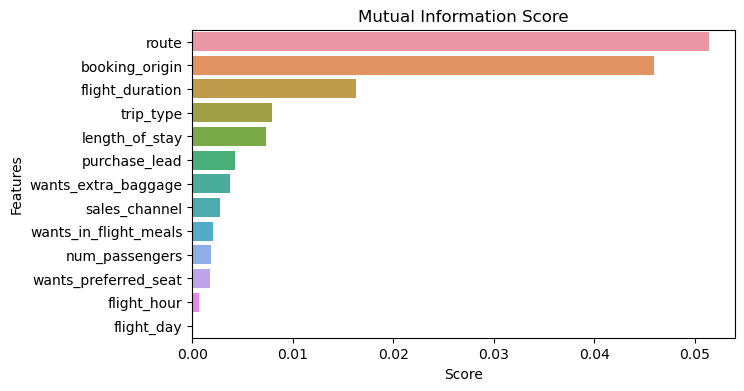

In [12]:
plt.figure(figsize=(7,4))
sns.barplot(x=mi_score.values,y=mi_score.index,orient='h')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Mutual Information Score')
plt.show()

We can see

1.   route 
2.   booking_origin
3.   flight_duration          
4.   trip_type      
5.   length_of_stay          

 are the top 5 features which are dependant with booking_complete feature

### Model Building / Evaluation:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Model 1: Logistic Regression Model with top 5 features

In [14]:
X=x[['route','booking_origin','flight_duration','trip_type','length_of_stay']]
y=df.booking_complete

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

LR_model_1=LogisticRegression()
LR_model_1.fit(X_train,y_train)
y_pred=LR_model_1.predict(X_test)

print('Model Accuracy:',accuracy_score(y_test,y_pred)*100,'%')
print('AUC Score:',roc_auc_score(y_test,y_pred))

Model Accuracy: 85.2 %
AUC Score: 0.5


# Model 2: Logistic Regression Model with all features

In [15]:
X=x.copy()
y=df.booking_complete

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

LR_model_2=LogisticRegression(max_iter=5000)
LR_model_2.fit(X_train,y_train)
y_pred=LR_model_2.predict(X_test)

print('Model Accuracy:',accuracy_score(y_test,y_pred)*100,'%')
print('AUC Score:',roc_auc_score(y_test,y_pred))

Model Accuracy: 85.2 %
AUC Score: 0.5


# Model 3: Decision Tree classifier with top 5 features

In [16]:
X=x[['route','booking_origin','flight_duration','trip_type','length_of_stay']]
y=df.booking_complete

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

DT_model_1=tree.DecisionTreeClassifier()
DT_model_1.fit(X_train,y_train)
y_pred=DT_model_1.predict(X_test)

print('Model Accuracy:',accuracy_score(y_test,y_pred)*100,'%')
print('AUC Score:',roc_auc_score(y_test,y_pred))

Model Accuracy: 82.44 %
AUC Score: 0.5474495622382947


# Model 4: Decision Tree classifier with all features

In [17]:
X=x.copy()
y=df.booking_complete

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

DT_model_2=tree.DecisionTreeClassifier()
DT_model_2.fit(X_train,y_train)
y_pred=DT_model_2.predict(X_test)

print('Model Accuracy:',accuracy_score(y_test,y_pred)*100,'%')
print('AUC Score:',roc_auc_score(y_test,y_pred))

Model Accuracy: 78.19 %
AUC Score: 0.5973210886943282


#### Visualizing results:

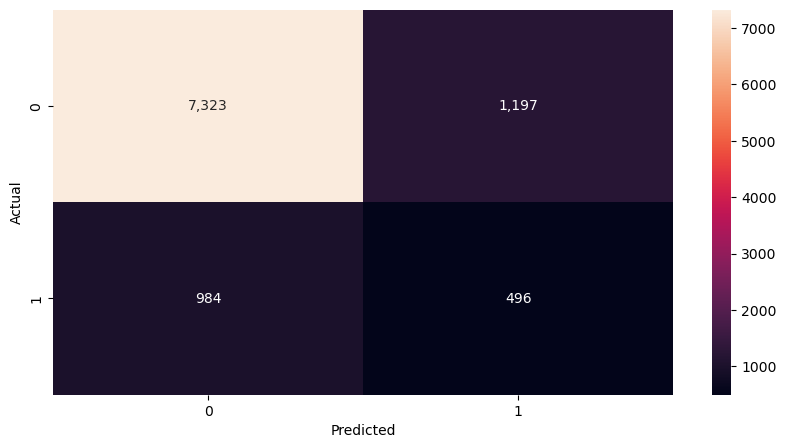

In [18]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt=',d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Interpretation:

## Out of these 4 predictive Models the best fit for the data is Logistic Regression model with top 5 features, which gives the Accuracy of 85.2 %. So, we consider the LR_model_1

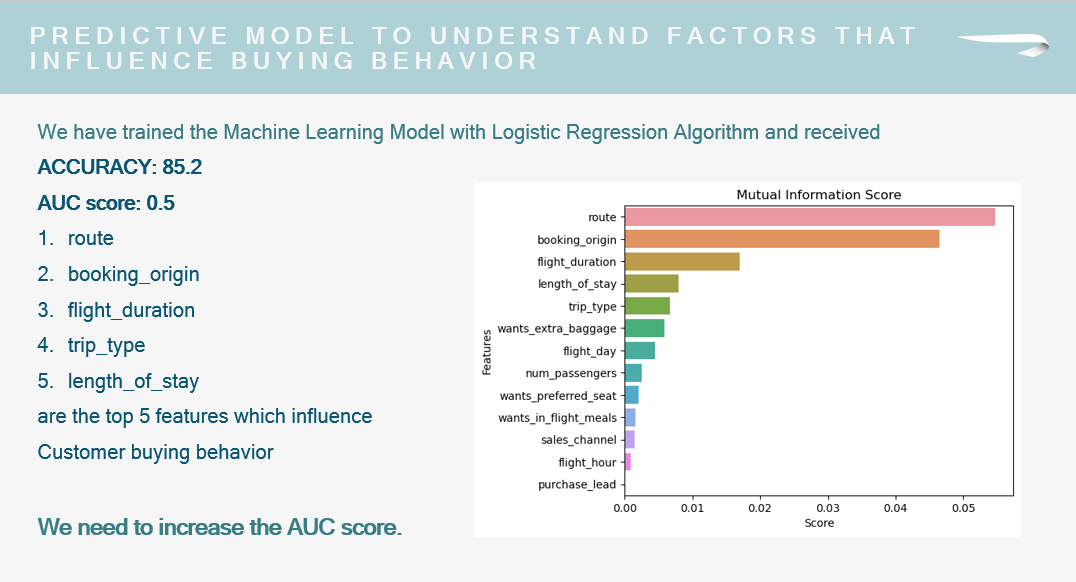